# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

/var/folders/fs/__bdqblj65l1mfg08j7wgfwh0000gp/T/ipykernel_21061/176598511.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'api_keys'

In [2]:
! ls

Applications Users        cores        home         sbin         var
Library      Volumes      dev          opt          tmp
System       bin          etc          private      usr


lizmartin/python-api-challenge/api_keys.py

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={'metric'}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | lib
Processing Record 5 of Set 1 | daru
Processing Record 6 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 7 of Set 1 | eruh
Processing Record 8 of Set 1 | quellon
Processing Record 9 of Set 1 | brookings
Processing Record 10 of Set 1 | alotau
City not found. Skipping...
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | sanya
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 o

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,26.35,74,99,0.16,PN,1708924268
1,punta arenas,-53.1500,-70.9167,11.06,87,75,1.54,CL,1708924608
2,uturoa,-16.7333,-151.4333,28.77,78,46,5.19,PF,1708924608
3,lib,8.3122,167.3766,27.69,81,22,6.67,MH,1708924609
4,daru,-9.0763,143.2092,30.16,74,57,1.49,PG,1708924609


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,26.35,74,99,0.16,PN,1708924268
1,punta arenas,-53.1500,-70.9167,11.06,87,75,1.54,CL,1708924608
2,uturoa,-16.7333,-151.4333,28.77,78,46,5.19,PF,1708924608
3,lib,8.3122,167.3766,27.69,81,22,6.67,MH,1708924609
4,daru,-9.0763,143.2092,30.16,74,57,1.49,PG,1708924609


In [41]:
#Convert timestamp to date. From GeeksforGeeks.com
import datetime
timestamp = datetime.datetime.fromtimestamp(city_data_df.iloc[0, 8])
date = timestamp.strftime('%Y-%m-%d')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

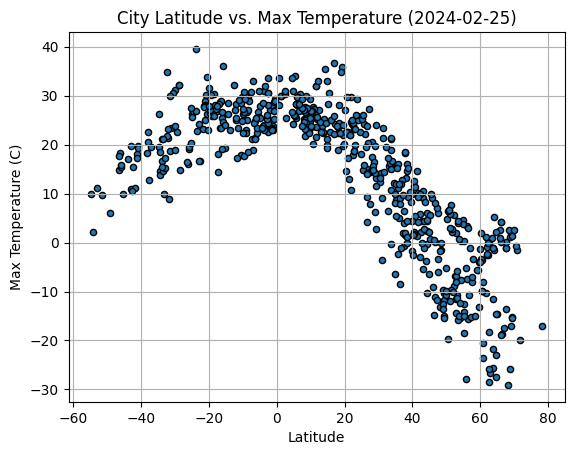

In [35]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({date})")

# Save the figure
plt.savefig("output_data/Fig1_lms.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

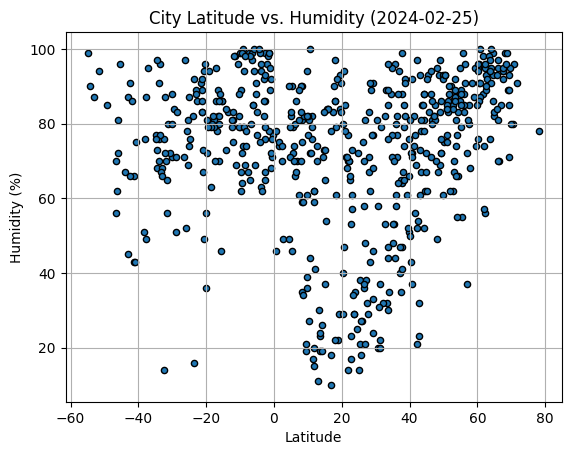

In [37]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2_lms.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

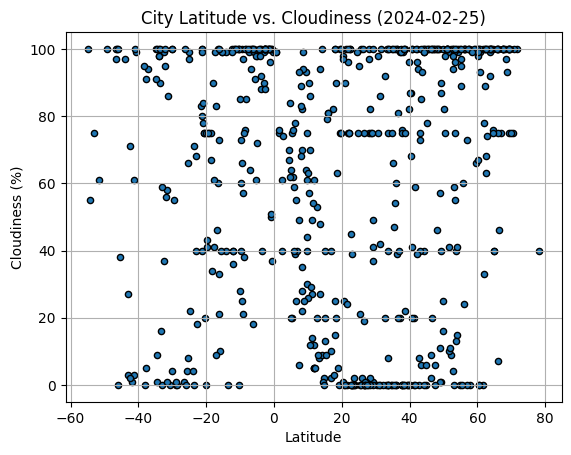

In [38]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")


# Save the figure
plt.savefig("output_data/Fig3_lms.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

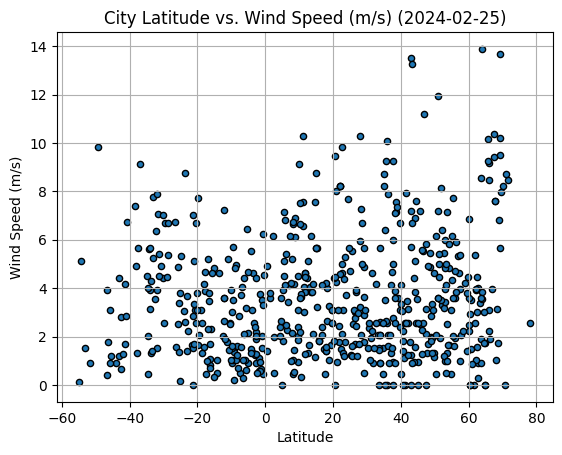

In [40]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed (m/s) ({date})")


# Save the figure
plt.savefig("output_data/Fig4_lms.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def lin_reg_line(x, y, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    lr_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x,y)
    plt.plot(x,lr_values,"r-")
    plt.annotate(line_eq,(min(x)+20, max(y)-7),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r value is: {rvalue}")
    plt.show()


In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,lib,8.3122,167.3766,27.69,81,22,6.67,MH,1708924609
5,eruh,37.7517,42.1811,1.46,47,0,2.75,TR,1708924610
7,brookings,44.3114,-96.7984,2.32,81,40,5.14,US,1708924611
8,dudinka,69.4058,86.1778,-15.21,93,100,13.70,RU,1708924583
11,sanya,18.2431,109.5050,28.09,61,20,4.00,CN,1708924613


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,26.35,74,99,0.16,PN,1708924268
1,punta arenas,-53.1500,-70.9167,11.06,87,75,1.54,CL,1708924608
2,uturoa,-16.7333,-151.4333,28.77,78,46,5.19,PF,1708924608
4,daru,-9.0763,143.2092,30.16,74,57,1.49,PG,1708924609
6,quellon,-43.1167,-73.6167,10.86,87,3,1.20,CL,1708924611


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.877745763879149


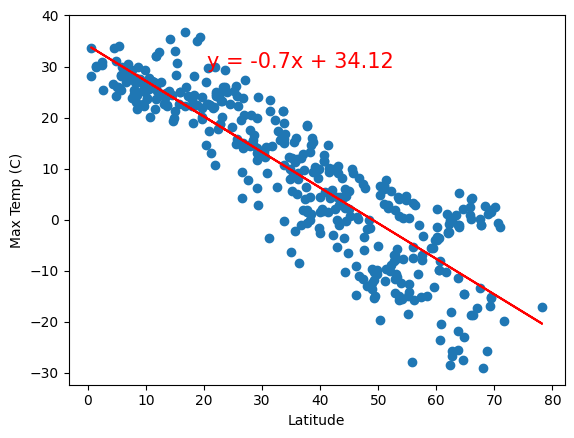

In [53]:
# Linear regression on Northern Hemisphere
lin_reg_line(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)")

The r value is: 0.6095390050238685


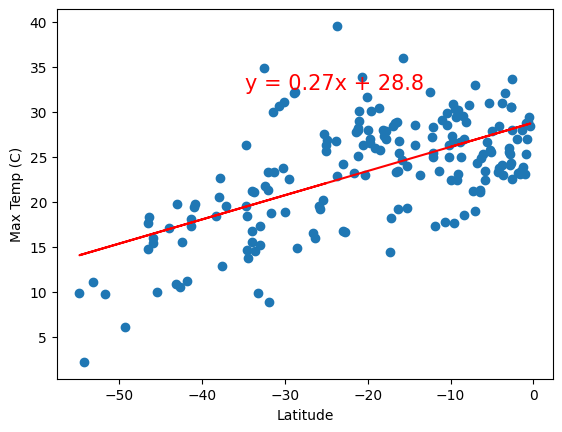

In [54]:
# Linear regression on Southern Hemisphere
lin_reg_line(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)")

**Discussion about the linear relationship:** As expected, both show a strong relationship between max temperature and proximity to the equator. The close the location is to the equator (Latitude of 0) the higher the max temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.4262353892522217


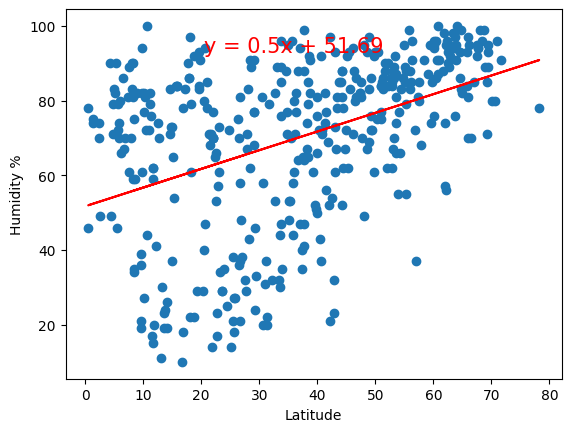

In [55]:
# Northern Hemisphere
lin_reg_line(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity %")

The r value is: 0.25130975291624075


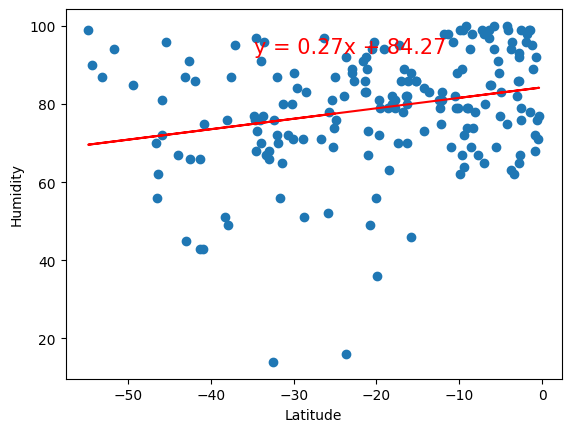

In [56]:
# Southern Hemisphere
lin_reg_line(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** While there is a correlation between proximity to the equator (Latitude of 0) and humidity level, it isn't a strong relationship. This likely has more to do with other weather and geographic phenomenon. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.2882238946790256


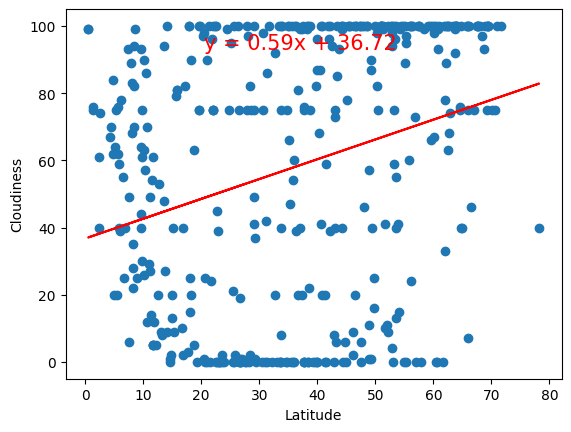

In [57]:
# Northern Hemisphere
lin_reg_line(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r value is: 0.2606474805498464


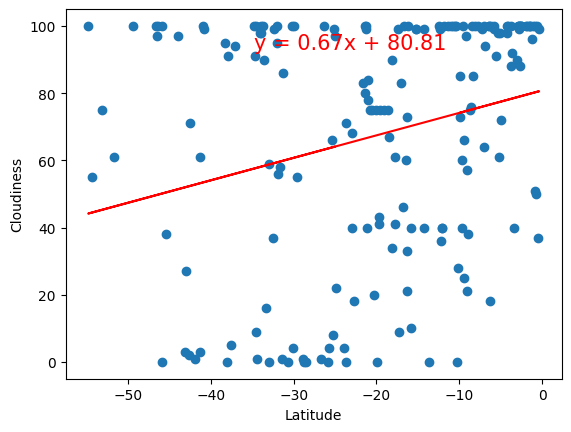

In [58]:
# Southern Hemisphere
lin_reg_line(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** There is no significant relationship between latitude and cloudiness. I found this to be somewhat expected as cloudiness likely has more to do with surrounding bodies of water and geological geography. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.07963459475930645


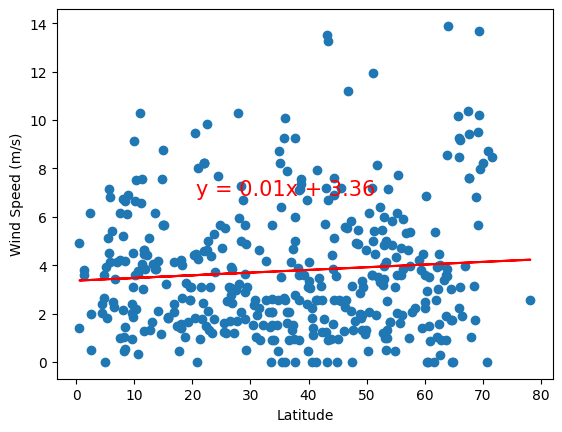

In [59]:
# Northern Hemisphere
lin_reg_line(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)")

The r value is: -0.23517841156132022


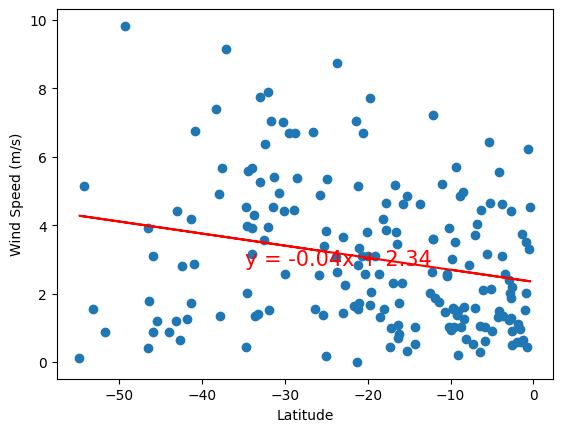

In [60]:
# Southern Hemisphere
lin_reg_line(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** There is no significiant realtionship between windspeed and latitude. 